In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import raw House Data

## Data understanding

In [64]:
data = pd.read_csv('/content/raw_house_data - raw_house_data.csv')
data

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",NaN
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",NaN
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,3601.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",NaN
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,2318.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1.0,"Carpet, Ceramic Tile",43
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,1772.0,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0.0,Ceramic Tile,NaN
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4.0,3724.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",NaN


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         4994 non-null   float64
 10  sqrt_ft           4944 non-null   float64
 11  garage            4993 non-null   float64
 12  kitchen_features  4967 non-null   object 
 13  fireplaces        4975 non-null   float64
 14  floor_covering    4999 non-null   object 
 15  HOA               4438 non-null   object 
dtypes: float64(9), int64(4), object(3)
memory 

In [66]:
data.shape

(5000, 16)

In [67]:
data.describe()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,4990.000000,5.000000e+03,5000.00000,5000.000000,4994.000000,4944.000000,4993.000000,4975.000000
mean,2.127070e+07,7.746262e+05,85723.025600,-110.912107,32.308512,4.661317,9.402828e+03,1992.32800,3.933800,3.829896,3716.366828,2.816143,1.885226
std,2.398508e+06,3.185556e+05,38.061712,0.120629,0.178028,51.685230,1.729385e+05,65.48614,1.245362,1.387063,1120.683515,1.192946,1.136578
min,3.042851e+06,1.690000e+05,85118.000000,-112.520168,31.356362,0.000000,0.000000e+00,0.00000,1.000000,1.000000,1100.000000,0.000000,0.000000
25%,2.140718e+07,5.850000e+05,85718.000000,-110.979260,32.277484,0.580000,4.803605e+03,1987.00000,3.000000,3.000000,3047.000000,2.000000,1.000000
50%,2.161469e+07,6.750000e+05,85737.000000,-110.923420,32.318517,0.990000,6.223760e+03,1999.00000,4.000000,4.000000,3512.000000,3.000000,2.000000
75%,2.180480e+07,8.350000e+05,85749.000000,-110.859078,32.394334,1.757500,8.082830e+03,2006.00000,4.000000,4.000000,4130.250000,3.000000,3.000000
max,2.192856e+07,5.300000e+06,86323.000000,-109.454637,34.927884,2154.000000,1.221508e+07,2019.00000,36.000000,36.000000,22408.000000,30.000000,9.000000


In [68]:
data= data.drop_duplicates()
data.shape
## no duplicates

(5000, 16)

## Handle Missing Values

In [69]:
data.isnull().sum()

,0
MLS,0
sold_price,0
zipcode,0
longitude,0
latitude,0
lot_acres,10
taxes,0
year_built,0
bedrooms,0
bathrooms,6


In [70]:
# Impute 'HOA' with the 0 value
data['HOA'] = data['HOA'].fillna(0)

# Impute 'sqft_ft' with the median value
data['sqrt_ft'] = data['sqrt_ft'].fillna(data['sqrt_ft'].median())

# Impute 'lot_acres' with the median value
data['lot_acres'] = data['lot_acres'].fillna(data['lot_acres'].median())

# Impute 'fireplaces' with the median value
data['fireplaces'] = data['fireplaces'].fillna(data['fireplaces'].median())

# # Impute 'garage' with the median value
data['garage'] = data['garage'].fillna(data['garage'].median())

# Impute 'bathrooms' with the median value
data['bathrooms'] = data['bathrooms'].fillna(data['bathrooms'].median())

# Impute 'kitchen_features' with the Mode value
data['kitchen_features'] = data['kitchen_features'].fillna(data['kitchen_features'].mode()[0])

# Impute 'floor_covering' with the Mode value
data['floor_covering'] = data['floor_covering'].fillna(data['floor_covering'].mode()[0])

data.isnull().sum()


,0
MLS,0
sold_price,0
zipcode,0
longitude,0
latitude,0
lot_acres,0
taxes,0
year_built,0
bedrooms,0
bathrooms,0


In [71]:
data

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,3512.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",0
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",0
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,3601.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",0
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,2318.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1.0,"Carpet, Ceramic Tile",43
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,1772.0,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0.0,Ceramic Tile,0
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4.0,3724.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",0


## Other feature

In [72]:
data['price_per_sqft'] = data['sold_price']/data['sqrt_ft']
data["category"] = data["price_per_sqft"]//500
print(data['category'].unique())

[1. 2. 0.]


In [73]:
data['category'].value_counts()

,count
category,
0.0,4960
1.0,38
2.0,2


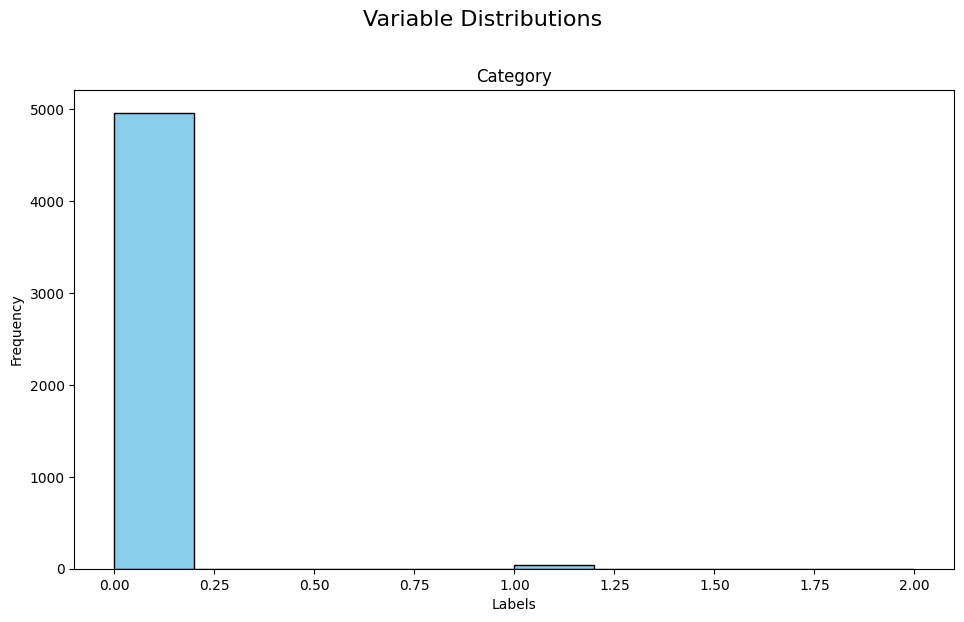

In [74]:
# Function to plot variable distributions
def plot_variable_distributions(df):
    features = ['category']
    plt.figure(figsize=(10, 6))

    for i, feature in enumerate(features, 1):
        plt.subplot(1, 1, i)
        df[feature].hist(grid=False, color='skyblue', edgecolor='black')
        plt.title(feature.capitalize(), fontsize=12)
        plt.xlabel("Labels", fontsize=10)
        plt.ylabel("Frequency", fontsize=10)
        plt.xticks(rotation=0)

    plt.tight_layout(pad=2.0)
    plt.suptitle("Variable Distributions", fontsize=16, y=1.05)
    plt.show()

plot_variable_distributions(data)

## Distribution

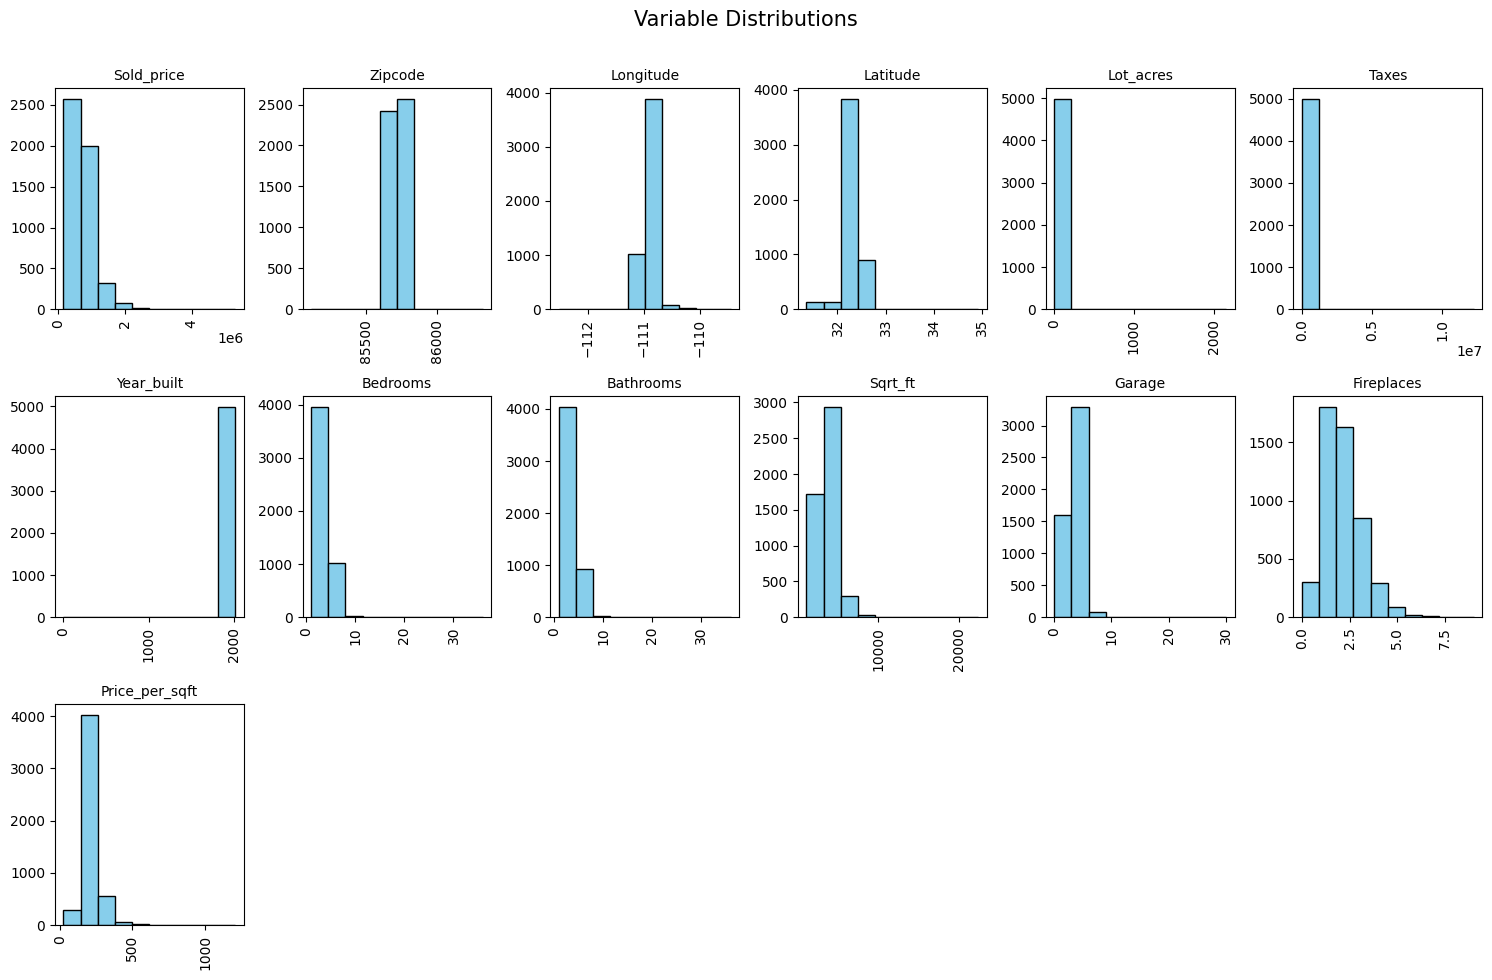

In [75]:
columns_to_plot=['sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage', 'fireplaces', 'price_per_sqft']
# Function to plot variable distributions
def plot_variable_distributions(df):
    features = columns_to_plot
    plt.figure(figsize=(15, 15))

    for i, feature in enumerate(features, 1):
        plt.subplot(5, 6, i)  # Adjust the grid size as per the number of features
        df[feature].hist(grid=False, color='skyblue', edgecolor='black')
        plt.title(feature.capitalize(), fontsize=10)
        plt.xlabel("")
        plt.ylabel("")
        plt.xticks(rotation=90)

    plt.tight_layout(pad=1)
    plt.suptitle("Variable Distributions", fontsize=15, y=1.03)
    plt.show()

# Call the function to plot histograms of the DataFrame excluding the first column
plot_variable_distributions(data)

## Label Encoding

In [76]:
data = pd.get_dummies(data, columns=['kitchen_features', 'floor_covering'], drop_first=True)
encoded_columns = data.filter(like='kitchen_features_').columns.union(data.filter(like='floor_covering_').columns)
data[encoded_columns] = data[encoded_columns].astype(int)
data


,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,...,floor_covering_Other: Travertine,floor_covering_Other: travertine,"floor_covering_Vinyl, Wood",floor_covering_Wood,"floor_covering_Wood, Other","floor_covering_Wood, Other: Lime Stone","floor_covering_Wood, Other: Porcelain tile","floor_covering_Wood, Other: Travertine","floor_covering_Wood, Other: Travertine/Marble","floor_covering_Wood, Other: porcelain tile"
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,...,0,0,0,0,0,0,0,0,0,0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,...,0,0,0,0,0,0,0,0,0,0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,...,0,0,0,0,0,0,0,0,0,0
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,...,0,0,0,0,0,0,0,0,0,0
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,...,0,0,0,0,0,0,0,0,0,0
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,...,0,0,0,0,0,0,0,0,0,0
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,...,0,0,0,0,0,0,0,0,0,0
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4.0,...,0,0,0,0,0,0,0,0,0,0


## Variable transformation

In [77]:
data['Lot_acres_log'] = np.log1p(data['lot_acres'])
data['Taxes_log'] = np.log1p(data['taxes'])
data['Bathrooms_log'] = np.log1p(data['bathrooms'])
data['Bedrooms_log'] = np.log1p(data['bedrooms'])
data['Garage_sqrt'] = np.sqrt(data['garage'])
data['Fireplaces_sqrt'] = np.sqrt(data['fireplaces'])
data['price_per_sqft_log'] = np.log1p(data['price_per_sqft'])

# columns_to_drop = ['lot_acres', 'taxes', 'bathrooms', 'garage', 'fireplaces']
# data = data.drop(columns=columns_to_drop)
data

<ipython-input-77-9a36597b6cb2>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Lot_acres_log'] = np.log1p(data['lot_acres'])
<ipython-input-77-9a36597b6cb2>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Taxes_log'] = np.log1p(data['taxes'])
<ipython-input-77-9a36597b6cb2>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented f

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,...,"floor_covering_Wood, Other: Travertine","floor_covering_Wood, Other: Travertine/Marble","floor_covering_Wood, Other: porcelain tile",Lot_acres_log,Taxes_log,Bathrooms_log,Bedrooms_log,Garage_sqrt,Fireplaces_sqrt,price_per_sqft_log
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,...,0,0,0,7.675546,8.570355,2.397895,2.639057,0.000000,2.449490,6.226066
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,...,0,0,0,7.443078,9.251805,1.098612,1.098612,0.000000,2.236068,6.356702
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,...,0,0,0,7.443078,9.257510,1.386294,1.098612,1.732051,2.236068,7.087490
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,...,0,0,0,6.457821,9.038315,1.791759,2.079442,2.000000,2.000000,6.214501
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,...,0,0,0,1.437463,9.641733,1.945910,1.609438,1.732051,2.236068,6.281093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,...,0,0,0,1.788421,7.609862,1.386294,1.791759,1.732051,1.000000,4.930595
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,...,0,0,0,0.883768,8.481153,1.386294,1.609438,1.732051,1.000000,5.473419
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,...,0,0,0,2.569554,6.908755,1.098612,1.386294,0.000000,0.000000,5.594930
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4.0,...,0,0,0,0.698135,8.669731,1.609438,1.609438,1.732051,1.000000,5.001868


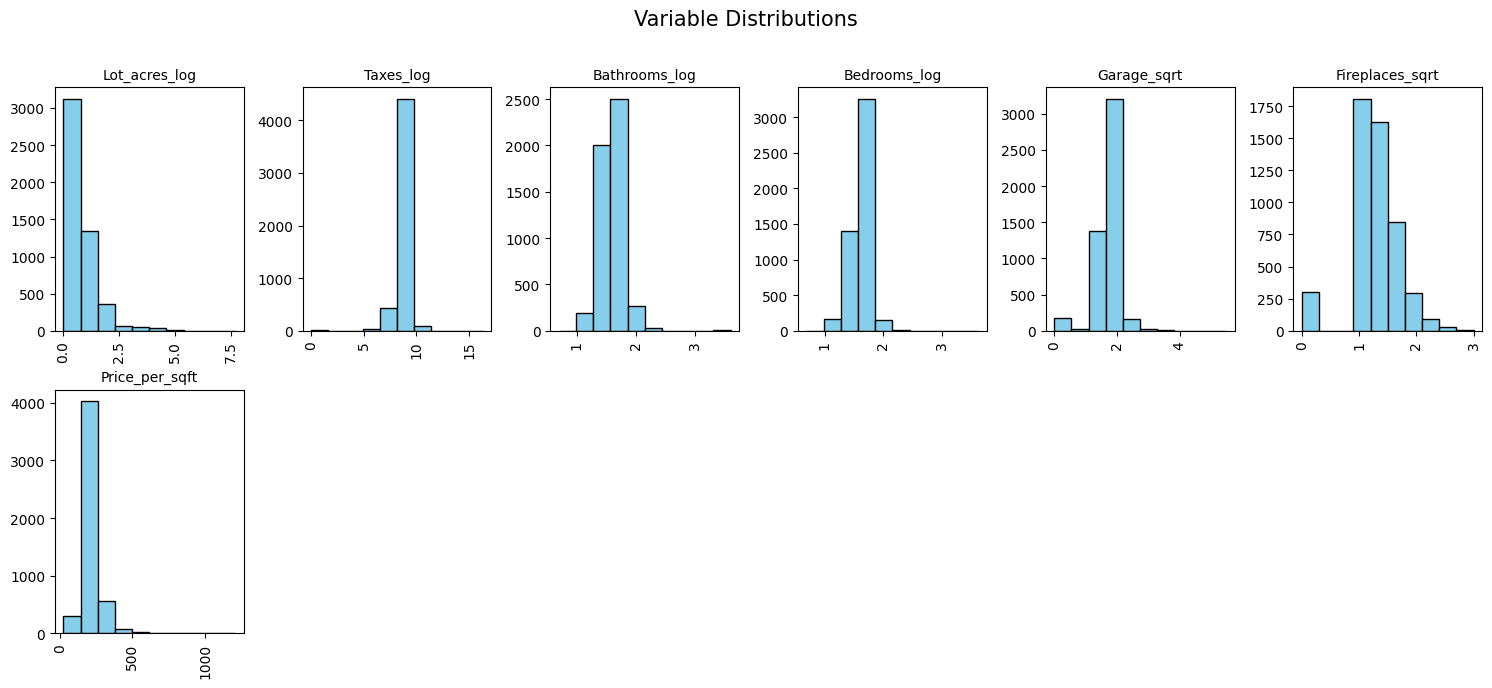

In [78]:
columns_to_plot=['Lot_acres_log','Taxes_log', 'Bathrooms_log', 'Bedrooms_log', 'Garage_sqrt', 'Fireplaces_sqrt', 'price_per_sqft']
# Function to plot variable distributions
def plot_variable_distributions(df):
    features = columns_to_plot
    plt.figure(figsize=(15, 15))

    for i, feature in enumerate(features, 1):
        plt.subplot(5, 6, i)  # Adjust the grid size as per the number of features
        df[feature].hist(grid=False, color='skyblue', edgecolor='black')
        plt.title(feature.capitalize(), fontsize=10)
        plt.xlabel("")
        plt.ylabel("")
        plt.xticks(rotation=90)

    plt.tight_layout(pad=1)
    plt.suptitle("Variable Distributions", fontsize=15, y=1.03)
    plt.show()

# Call the function to plot histograms of the DataFrame excluding the first column
plot_variable_distributions(data)

In [79]:
data.shape

(5000, 2202)

 ## Outlier Detection and Treatment

In [80]:
## convert to numeric
def convert_to_numeric(df):
    # Convert all columns to numeric, forcing errors to NaN
    df = df.apply(pd.to_numeric, errors='coerce').fillna(0)
    return df
data= convert_to_numeric(data)
data

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,...,"floor_covering_Wood, Other: Travertine","floor_covering_Wood, Other: Travertine/Marble","floor_covering_Wood, Other: porcelain tile",Lot_acres_log,Taxes_log,Bathrooms_log,Bedrooms_log,Garage_sqrt,Fireplaces_sqrt,price_per_sqft_log
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,...,0,0,0,7.675546,8.570355,2.397895,2.639057,0.000000,2.449490,6.226066
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,...,0,0,0,7.443078,9.251805,1.098612,1.098612,0.000000,2.236068,6.356702
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,...,0,0,0,7.443078,9.257510,1.386294,1.098612,1.732051,2.236068,7.087490
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,...,0,0,0,6.457821,9.038315,1.791759,2.079442,2.000000,2.000000,6.214501
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,...,0,0,0,1.437463,9.641733,1.945910,1.609438,1.732051,2.236068,6.281093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,...,0,0,0,1.788421,7.609862,1.386294,1.791759,1.732051,1.000000,4.930595
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,...,0,0,0,0.883768,8.481153,1.386294,1.609438,1.732051,1.000000,5.473419
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,...,0,0,0,2.569554,6.908755,1.098612,1.386294,0.000000,0.000000,5.594930
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4.0,...,0,0,0,0.698135,8.669731,1.609438,1.609438,1.732051,1.000000,5.001868


In [81]:
# Count the number of NaN values in the "HOA" column
null_count = data['HOA'].isna().sum()
print(f"Number of null values in 'HOA': {null_count}")


Number of null values in 'HOA': 0


In [82]:
# plt.figure(figsize=(8, 6))
# plt.boxplot(data['Taxes_log'])
# plt.title('Box Plot for bathrooms')
# plt.ylabel('Values')
# plt.show()


In [83]:
def treat_outliers(df, features):
    df_filtered = df.copy()
    for column in features:
        Q1 = df_filtered[column].quantile(0.25)
        Q3 = df_filtered[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_filtered = df_filtered[(df_filtered[column] >= lower_bound) & (df_filtered[column] <= upper_bound)]
    return df_filtered



# data['Lot_acres_log'] = np.log1p(data['lot_acres'])
# data['Taxes_log'] = np.log1p(data['taxes'])
# data['Bathrooms_log'] = np.log1p(data['bathrooms'])
# data['Bedrooms_log'] = np.log1p(data['bedrooms'])
# data['Garage_sqrt'] = np.sqrt(data['garage'])
# data['Fireplaces_sqrt'] = np.sqrt(data['fireplaces'])


n_features= ['sold_price', 'longitude', 'latitude', 'year_built', 'sqrt_ft',
'HOA', 'Lot_acres_log', 'Taxes_log', 'Bathrooms_log', 'Bedrooms_log', 'Garage_sqrt', 'Fireplaces_sqrt','price_per_sqft']
data_cleaned = treat_outliers(data, n_features)
data_cleaned


,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,...,"floor_covering_Wood, Other: Travertine","floor_covering_Wood, Other: Travertine/Marble","floor_covering_Wood, Other: porcelain tile",Lot_acres_log,Taxes_log,Bathrooms_log,Bedrooms_log,Garage_sqrt,Fireplaces_sqrt,price_per_sqft_log
313,21510119,1000000.0,85755,-110.992170,32.458323,3.49,14400.00,2005,3,4.0,...,0,0,0,1.501853,9.575053,1.609438,1.386294,1.732051,1.732051,5.485913
359,21125701,1200000.0,85750,-110.846659,32.326433,1.05,9450.00,1999,4,3.0,...,0,0,0,0.717840,9.153876,1.386294,1.609438,1.732051,1.414214,5.665869
361,21317020,1150000.0,85658,-111.085082,32.464902,0.75,13534.17,2007,4,5.0,...,0,0,0,0.559616,9.513047,1.791759,1.609438,1.732051,1.732051,5.684828
371,21305294,1200000.0,85718,-110.942288,32.347119,0.99,12434.42,2002,3,4.0,...,0,0,0,0.688135,9.428304,1.609438,1.386294,1.732051,1.414214,5.632955
391,21408527,1165000.0,85718,-110.942544,32.348593,1.06,13129.23,2005,3,3.0,...,0,0,0,0.722706,9.482672,1.386294,1.386294,1.732051,1.732051,5.586044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989,21902512,545000.0,85745,-111.061493,32.306472,1.19,6326.96,2007,4,3.0,...,0,0,0,0.783902,8.752733,1.386294,1.609438,2.000000,1.000000,4.993865
4993,21908358,565000.0,85750,-110.820216,32.307646,0.83,4568.71,1986,4,3.0,...,0,0,0,0.604316,8.427205,1.386294,1.609438,1.414214,1.414214,5.307541
4994,21909379,535000.0,85718,-110.922291,32.317496,0.18,4414.00,2002,3,2.0,...,0,0,0,0.165514,8.392763,1.098612,1.386294,1.414214,1.000000,5.541405
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,...,0,0,0,0.883768,8.481153,1.386294,1.609438,1.732051,1.000000,5.473419


In [84]:
# plt.figure(figsize=(8, 6))
# plt.boxplot(data['Taxes_log'])
# plt.title('Box Plot for bathrooms')
# plt.ylabel('Values')
# plt.show()


## Scaling

In [85]:
# def min_max_scale(df, exclude_column):
#     df_scaled = df.copy()
#     for column in df_scaled.columns:
#         if column != exclude_column:
#             min_value = df_scaled[column].min()
#             max_value = df_scaled[column].max()
#             df_scaled[column] = (df_scaled[column] - min_value) / (max_value - min_value)
#     return df_scaled
# data_scaled = min_max_scale(data, 'sold_price')
# data_scaled

In [86]:
def min_max_scale(df, exclude_columns):
    df_scaled = df.copy()
    for column in df_scaled.columns:
        if column not in exclude_columns:
            min_value = df_scaled[column].min()
            max_value = df_scaled[column].max()
            df_scaled[column] = (df_scaled[column] - min_value) / (max_value - min_value)
    return df_scaled
exclude_columns = ['MLS','sold_price', 'category']
data_scaled = min_max_scale(data, exclude_columns)
data_scaled


,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,...,"floor_covering_Wood, Other: Travertine","floor_covering_Wood, Other: Travertine/Marble","floor_covering_Wood, Other: porcelain tile",Lot_acres_log,Taxes_log,Bathrooms_log,Bedrooms_log,Garage_sqrt,Fireplaces_sqrt,price_per_sqft_log
0,21530491,5300000.0,0.430705,0.698727,0.000000,1.000000,0.000432,0.961367,0.342857,0.257143,...,0.0,0.0,0.0,1.000000,0.525203,0.584264,0.666917,0.000000,0.816497,0.774003
1,21529082,4200000.0,0.438174,0.481090,0.066597,0.792479,0.000853,0.989104,0.028571,0.028571,...,0.0,0.0,0.0,0.969713,0.566963,0.138964,0.138964,0.000000,0.745356,0.807869
2,3054672,4200000.0,0.438174,0.482612,0.066773,0.792479,0.000858,0.989104,0.028571,0.057143,...,0.0,0.0,0.0,0.969713,0.567313,0.237561,0.138964,0.316228,0.745356,0.997321
3,21919321,4500000.0,0.438174,0.484172,0.081062,0.295576,0.000689,0.955919,0.171429,0.114286,...,0.0,0.0,0.0,0.841350,0.553880,0.376525,0.475121,0.365148,0.666667,0.771005
4,21306357,3411450.0,0.524481,0.556641,0.260057,0.001490,0.001260,0.988113,0.085714,0.142857,...,0.0,0.0,0.0,0.187278,0.590858,0.429356,0.314038,0.316228,0.745356,0.788268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,0.434025,0.606205,0.154431,0.002312,0.000165,0.993066,0.114286,0.057143,...,0.0,0.0,0.0,0.233002,0.466343,0.237561,0.376525,0.316228,0.333333,0.438162
4996,21908591,550000.0,0.524481,0.542031,0.268796,0.000659,0.000395,0.985636,0.085714,0.057143,...,0.0,0.0,0.0,0.115141,0.519736,0.237561,0.314038,0.316228,0.333333,0.578885
4997,21832452,475000.0,0.061411,0.575672,0.450325,0.005599,0.000082,0.975235,0.057143,0.028571,...,0.0,0.0,0.0,0.334772,0.423378,0.138964,0.237561,0.000000,0.000000,0.610386
4998,21900515,550000.0,0.520332,0.477777,0.263336,0.000469,0.000477,0.995047,0.085714,0.085714,...,0.0,0.0,0.0,0.090956,0.531293,0.314038,0.314038,0.316228,0.333333,0.456639


In [87]:
data_scaled.shape

(5000, 2202)

In [88]:
data_scaled.isnull().sum()

,0
MLS,0
sold_price,0
zipcode,0
longitude,0
latitude,0
...,...
Bathrooms_log,0
Bedrooms_log,0
Garage_sqrt,0
Fireplaces_sqrt,0


##Model 1

In [89]:
model_data = data_scaled.copy()
model_data

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,...,"floor_covering_Wood, Other: Travertine","floor_covering_Wood, Other: Travertine/Marble","floor_covering_Wood, Other: porcelain tile",Lot_acres_log,Taxes_log,Bathrooms_log,Bedrooms_log,Garage_sqrt,Fireplaces_sqrt,price_per_sqft_log
0,21530491,5300000.0,0.430705,0.698727,0.000000,1.000000,0.000432,0.961367,0.342857,0.257143,...,0.0,0.0,0.0,1.000000,0.525203,0.584264,0.666917,0.000000,0.816497,0.774003
1,21529082,4200000.0,0.438174,0.481090,0.066597,0.792479,0.000853,0.989104,0.028571,0.028571,...,0.0,0.0,0.0,0.969713,0.566963,0.138964,0.138964,0.000000,0.745356,0.807869
2,3054672,4200000.0,0.438174,0.482612,0.066773,0.792479,0.000858,0.989104,0.028571,0.057143,...,0.0,0.0,0.0,0.969713,0.567313,0.237561,0.138964,0.316228,0.745356,0.997321
3,21919321,4500000.0,0.438174,0.484172,0.081062,0.295576,0.000689,0.955919,0.171429,0.114286,...,0.0,0.0,0.0,0.841350,0.553880,0.376525,0.475121,0.365148,0.666667,0.771005
4,21306357,3411450.0,0.524481,0.556641,0.260057,0.001490,0.001260,0.988113,0.085714,0.142857,...,0.0,0.0,0.0,0.187278,0.590858,0.429356,0.314038,0.316228,0.745356,0.788268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,0.434025,0.606205,0.154431,0.002312,0.000165,0.993066,0.114286,0.057143,...,0.0,0.0,0.0,0.233002,0.466343,0.237561,0.376525,0.316228,0.333333,0.438162
4996,21908591,550000.0,0.524481,0.542031,0.268796,0.000659,0.000395,0.985636,0.085714,0.057143,...,0.0,0.0,0.0,0.115141,0.519736,0.237561,0.314038,0.316228,0.333333,0.578885
4997,21832452,475000.0,0.061411,0.575672,0.450325,0.005599,0.000082,0.975235,0.057143,0.028571,...,0.0,0.0,0.0,0.334772,0.423378,0.138964,0.237561,0.000000,0.000000,0.610386
4998,21900515,550000.0,0.520332,0.477777,0.263336,0.000469,0.000477,0.995047,0.085714,0.085714,...,0.0,0.0,0.0,0.090956,0.531293,0.314038,0.314038,0.316228,0.333333,0.456639


## Select featutes

In [90]:
# ## Testing on category
# import statsmodels.api as sm
# X_features_cat= model_data.drop(['category', 'sold_price', 'MLS'], axis=1)
# y_features_cat= model_data['category']

# def forward_regression(X, y,
#                        threshold_in,
#                        verbose=True):
#     initial_list = []
#     included = list(initial_list)
#     model=sm.OLS(X,y)
#     while True:
#         changed=False
#         excluded = list(set(X.columns)-set(included))
#         new_pval = pd.Series(index=excluded)
#         for new_column in excluded:
#             model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
#             new_pval[new_column] = model.pvalues[new_column]
#         best_pval = new_pval.min()
#         if best_pval < threshold_in:
#             best_feature = new_pval.idxmin()
#             included.append(best_feature)
#             changed=True
#             if verbose:
#                 print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

#         if not changed:
#             break

#     return included


# model=forward_regression(X_features_cat,y_features_cat,0.05)
# print(f'Useful predictors are :{model}')

In [91]:
#X_features_cat

## Sampling

In [92]:
majority_class = model_data[model_data['category'] == 0.0]
minority_class_1 = model_data[model_data['category'] == 1.0]
minority_class_2 = model_data[model_data['category'] == 2.0]
model_data['category'].value_counts()

,count
category,
0.0,4960
1.0,38
2.0,2


In [93]:
oversampled_minority_class_1 = minority_class_1.sample(n=len(majority_class), replace=True, random_state=42)
oversampled_minority_class_2 = minority_class_2.sample(n=len(majority_class), replace=True, random_state=42)
balanced_model_data = pd.concat([majority_class, oversampled_minority_class_1, oversampled_minority_class_2])
balanced_model_data = balanced_model_data.sample(frac=1, random_state=42)

balanced_model_data['category'].value_counts()

,count
category,
2.0,4960
0.0,4960
1.0,4960


In [94]:
balanced_model_data

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,...,"floor_covering_Wood, Other: Travertine","floor_covering_Wood, Other: Travertine/Marble","floor_covering_Wood, Other: porcelain tile",Lot_acres_log,Taxes_log,Bathrooms_log,Bedrooms_log,Garage_sqrt,Fireplaces_sqrt,price_per_sqft_log
2,3054672,4200000.0,0.438174,0.482612,0.066773,0.792479,0.000858,0.989104,0.028571,0.057143,...,0.0,0.0,0.0,0.969713,0.567313,0.237561,0.138964,0.316228,0.745356,0.997321
3647,3061363,606000.0,0.411618,0.505405,0.136145,0.000715,0.000165,0.992075,0.057143,0.057143,...,0.0,0.0,0.0,0.121446,0.466312,0.237561,0.237561,0.316228,0.471405,0.496719
2,3054672,4200000.0,0.438174,0.482612,0.066773,0.792479,0.000858,0.989104,0.028571,0.057143,...,0.0,0.0,0.0,0.969713,0.567313,0.237561,0.138964,0.316228,0.745356,0.997321
2,3054672,4200000.0,0.438174,0.482612,0.066773,0.792479,0.000858,0.989104,0.028571,0.057143,...,0.0,0.0,0.0,0.969713,0.567313,0.237561,0.138964,0.316228,0.745356,0.997321
4906,21211486,498000.0,0.523651,0.566979,0.258002,0.000455,0.000426,0.987122,0.057143,0.057143,...,0.0,0.0,0.0,0.088997,0.524396,0.237561,0.237561,0.316228,0.471405,0.438291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,21731870,1700000.0,0.523651,0.574165,0.247111,0.008435,0.000704,0.967311,0.085714,0.085714,...,0.0,0.0,0.0,0.384773,0.555205,0.314038,0.314038,0.000000,0.471405,0.863317
279,21231400,1450000.0,0.419917,0.608654,0.020774,0.102136,0.000098,0.980684,0.000000,0.000000,...,0.0,0.0,0.0,0.703294,0.434540,0.000000,0.000000,0.258199,0.333333,1.000000
693,21224223,1073942.0,0.448133,0.463122,0.311589,0.000135,0.000069,0.997028,0.028571,0.057143,...,0.0,0.0,0.0,0.033176,0.413081,0.237561,0.138964,0.258199,0.471405,0.791956
896,21428632,950000.0,0.497925,0.517280,0.277182,0.000395,0.000299,0.997028,0.085714,0.085714,...,0.0,0.0,0.0,0.080149,0.502739,0.314038,0.314038,0.316228,0.333333,0.624234


In [95]:
model_data=balanced_model_data
model_data

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,...,"floor_covering_Wood, Other: Travertine","floor_covering_Wood, Other: Travertine/Marble","floor_covering_Wood, Other: porcelain tile",Lot_acres_log,Taxes_log,Bathrooms_log,Bedrooms_log,Garage_sqrt,Fireplaces_sqrt,price_per_sqft_log
2,3054672,4200000.0,0.438174,0.482612,0.066773,0.792479,0.000858,0.989104,0.028571,0.057143,...,0.0,0.0,0.0,0.969713,0.567313,0.237561,0.138964,0.316228,0.745356,0.997321
3647,3061363,606000.0,0.411618,0.505405,0.136145,0.000715,0.000165,0.992075,0.057143,0.057143,...,0.0,0.0,0.0,0.121446,0.466312,0.237561,0.237561,0.316228,0.471405,0.496719
2,3054672,4200000.0,0.438174,0.482612,0.066773,0.792479,0.000858,0.989104,0.028571,0.057143,...,0.0,0.0,0.0,0.969713,0.567313,0.237561,0.138964,0.316228,0.745356,0.997321
2,3054672,4200000.0,0.438174,0.482612,0.066773,0.792479,0.000858,0.989104,0.028571,0.057143,...,0.0,0.0,0.0,0.969713,0.567313,0.237561,0.138964,0.316228,0.745356,0.997321
4906,21211486,498000.0,0.523651,0.566979,0.258002,0.000455,0.000426,0.987122,0.057143,0.057143,...,0.0,0.0,0.0,0.088997,0.524396,0.237561,0.237561,0.316228,0.471405,0.438291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,21731870,1700000.0,0.523651,0.574165,0.247111,0.008435,0.000704,0.967311,0.085714,0.085714,...,0.0,0.0,0.0,0.384773,0.555205,0.314038,0.314038,0.000000,0.471405,0.863317
279,21231400,1450000.0,0.419917,0.608654,0.020774,0.102136,0.000098,0.980684,0.000000,0.000000,...,0.0,0.0,0.0,0.703294,0.434540,0.000000,0.000000,0.258199,0.333333,1.000000
693,21224223,1073942.0,0.448133,0.463122,0.311589,0.000135,0.000069,0.997028,0.028571,0.057143,...,0.0,0.0,0.0,0.033176,0.413081,0.237561,0.138964,0.258199,0.471405,0.791956
896,21428632,950000.0,0.497925,0.517280,0.277182,0.000395,0.000299,0.997028,0.085714,0.085714,...,0.0,0.0,0.0,0.080149,0.502739,0.314038,0.314038,0.316228,0.333333,0.624234


In [96]:
train_size = int(0.8 * len(model_data))
train_df = model_data[:train_size]
test_df = model_data[train_size:]

# X_train_model1 = train_df.drop(['category', 'sold_price', 'MLS'], axis=1)
X_train_model1 = train_df[['longitude', 'latitude', 'lot_acres', 'sqrt_ft', 'bedrooms', 'bathrooms']]
y_train_model1 = train_df['category']

# X_test_model1 = test_df.drop(['category', 'sold_price', 'MLS'], axis=1)
X_test_model1 = test_df[['longitude', 'latitude', 'lot_acres', 'sqrt_ft', 'bedrooms', 'bathrooms']]
y_test_model1 = test_df['category']

len(X_train_model1), len(y_train_model1), len(X_test_model1), len(y_test_model1)


(11904, 11904, 2976, 2976)

In [97]:
#y_train_model1.values.counts()

In [98]:
X_train_model1= X_train_model1.to_numpy()
X_test_model1=X_test_model1.to_numpy()
X_train_model1

array([[4.82611658e-01, 6.67732132e-02, 7.92479109e-01, 1.13196921e-01,
        2.85714286e-02, 5.71428571e-02],
       [5.05405426e-01, 1.36144758e-01, 7.14948932e-04, 1.13196921e-01,
        5.71428571e-02, 5.71428571e-02],
       [4.82611658e-01, 6.67732132e-02, 7.92479109e-01, 1.13196921e-01,
        2.85714286e-02, 5.71428571e-02],
       ...,
       [5.56640921e-01, 2.60057197e-01, 1.49025070e-03, 2.48545147e-01,
        8.57142857e-02, 1.42857143e-01],
       [5.43842160e-01, 2.60086036e-01, 7.89229341e-05, 6.32156936e-02,
        5.71428571e-02, 2.85714286e-02],
       [4.82611658e-01, 6.67732132e-02, 7.92479109e-01, 1.13196921e-01,
        2.85714286e-02, 5.71428571e-02]])

In [99]:
y_train_model1=y_train_model1.to_numpy().astype('int')
y_test_model1=y_test_model1.to_numpy().astype('int')
y_train_model1

array([2, 0, 2, ..., 1, 0, 2])

In [100]:
class KNNClassifier():

  def fit(self, X, y):
    self.X= X
    self.y= y

  def predict(self, X, K, epsilon=1e-3):
    N= len(X)
    y_hat= np.zeros(N)

    for i in range(N):
      dist2= np.sum((self.X-X[i])**2, axis=1)
      idxt= np.argsort(dist2)[:K]
      gamma_k = 1/(np.sqrt(dist2[idxt]+epsilon))

      y_hat[i]= np.bincount(self.y[idxt], weights= gamma_k).argmax()
    return y_hat

In [101]:
model1 = KNNClassifier()
model1.fit(X_train_model1,y_train_model1)

In [102]:
def accuracy(y, y_hat):
  return np.mean(y==y_hat)

In [103]:
best_k = 0
best_acc = 0
for i in range(3, 15):
  y_hat_k_model1 = model1.predict(X_test_model1, i)
  acc = accuracy(y_test_model1, y_hat_k_model1)
  if acc > best_acc:
    best_acc = acc
    best_k = i
print(best_k, best_acc)

3 0.9976478494623656


In [104]:
y_hat_model1= model1.predict(X_test_model1, 3)
y_hat_model1

array([0., 0., 1., ..., 1., 0., 1.])

In [105]:
train_df['category'].value_counts()

,count
category,
0.0,4000
1.0,3967
2.0,3937


In [106]:
#y_hat_model1= model1.predict(X_train_model1, 3)

In [107]:
accuracy(y_test_model1, y_hat_model1)

0.9976478494623656

In [108]:
#accuracy(y_train_model1, y_hat_model1)

In [109]:
#x_test=[[32.221680, -110.781160]]

In [110]:
#y_test = knn_loc.predict(x_test, 3)

In [111]:
#y_test

## Dataset for regressor

In [112]:
#X_train_model2 = train_df.drop(['category', 'sold_price', 'MLS'], axis=1)
X_train_model2 = train_df[['longitude', 'latitude', 'lot_acres', 'sqrt_ft', 'bedrooms', 'bathrooms']]
y_train_model2 = train_df['sold_price']

# X_test_model2 = test_df.drop(['category', 'sold_price', 'MLS'], axis=1)
X_test_model2 = test_df[['longitude', 'latitude', 'lot_acres', 'sqrt_ft', 'bedrooms', 'bathrooms']]
y_test_model2 = test_df['sold_price']

len(X_train_model2), len(y_train_model2), len(X_test_model2), len(y_test_model2)

(11904, 11904, 2976, 2976)

In [113]:
X_train_model2= X_train_model2.to_numpy()
X_test_model2=X_test_model2.to_numpy()
X_train_model2

array([[4.82611658e-01, 6.67732132e-02, 7.92479109e-01, 1.13196921e-01,
        2.85714286e-02, 5.71428571e-02],
       [5.05405426e-01, 1.36144758e-01, 7.14948932e-04, 1.13196921e-01,
        5.71428571e-02, 5.71428571e-02],
       [4.82611658e-01, 6.67732132e-02, 7.92479109e-01, 1.13196921e-01,
        2.85714286e-02, 5.71428571e-02],
       ...,
       [5.56640921e-01, 2.60057197e-01, 1.49025070e-03, 2.48545147e-01,
        8.57142857e-02, 1.42857143e-01],
       [5.43842160e-01, 2.60086036e-01, 7.89229341e-05, 6.32156936e-02,
        5.71428571e-02, 2.85714286e-02],
       [4.82611658e-01, 6.67732132e-02, 7.92479109e-01, 1.13196921e-01,
        2.85714286e-02, 5.71428571e-02]])

In [114]:
X_test_model2

array([[5.84369233e-01, 2.63608624e-01, 1.58774373e-03, 9.07171016e-02,
        8.57142857e-02, 5.71428571e-02],
       [5.13488202e-01, 3.10973585e-01, 9.28505107e-05, 5.39703398e-02,
        2.85714286e-02, 2.85714286e-02],
       [4.65308294e-01, 3.11815243e-01, 2.69266481e-04, 1.18265440e-01,
        8.57142857e-02, 1.14285714e-01],
       ...,
       [4.63122376e-01, 3.11589009e-01, 1.34633240e-04, 4.15336963e-02,
        2.85714286e-02, 5.71428571e-02],
       [5.17279714e-01, 2.77181829e-01, 3.94614670e-04, 1.06016520e-01,
        8.57142857e-02, 8.57142857e-02],
       [5.33841609e-01, 3.22932072e-01, 0.00000000e+00, 7.64501596e-02,
        2.85714286e-02, 5.71428571e-02]])

In [115]:
y_train_model2=y_train_model2.to_numpy().astype('int')
y_test_model2=y_test_model2.to_numpy().astype('int')
y_train_model2

array([4200000,  606000, 4200000, ..., 3411450,  625000, 4200000])

In [116]:
y_test_model2

array([ 600000,  550000, 1937000, ..., 1073942,  950000, 2150000])

## Regressor

In [117]:
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [118]:
def OLS(Y, Y_hat, N):
  return ((1/(2*N))*np.sum((Y-Y_hat)**2))

In [119]:
class MVLinearRegression():
  def fit(self, X, y, eta=1e-3, epochs= 1e3, show_curve=False):
    epochs = int(epochs)
    N, D = X.shape
    Y = y

    #Begin Optimization
    self.W = np.random.randn(D)
    self.J = np.zeros(epochs)

    #Stochastic Gradient Descent
    for epoch in range(epochs):
      Y_hat = self.predict(X)
      self.J[epoch]= OLS(Y,Y_hat, N)
      #weight Update Rule
      self.W -= eta*(1/N)*(X.T@(Y_hat-Y))

    if show_curve:
      plt.figure()
      plt.plot(self.J)
      plt.xlabel("Epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")

  def predict(self, X):
    return X@self.W


In [120]:
# class MVLinearRegression():
#   def fit(self, X, y, eta = 1e-3, epochs = 1e3, show_curve = False):
#     epochs = int(epochs)
#     N, D = X.shape
#     Y = y

#     #Begin Optimization
#     self.W = np.random.randn(D)
#     self.J = np.zeros(epochs)

#     #Stochastic Gradient Descent
#     for epoch in range(epochs):
#       Y_hat = self.predict(X)
#       self.J[epoch] = OLS(Y, Y_hat, N)
#       #Weight Update Rule
#       self.W -= eta*(1/N)*(X.T@(Y_hat-Y))

#     if show_curve:
#       plt.figure()
#       plt.plot(self.J)
#       plt.xlabel("epochs")
#       plt.ylabel("$\mathcal{J}$")
#       plt.title("Training Curve")

#   def predict(self, X):
#     return X@self.W

In [121]:
model2 = MVLinearRegression()

Best eta: 0.0005, Best epochs: 4000, Best error: 45.27963852573607


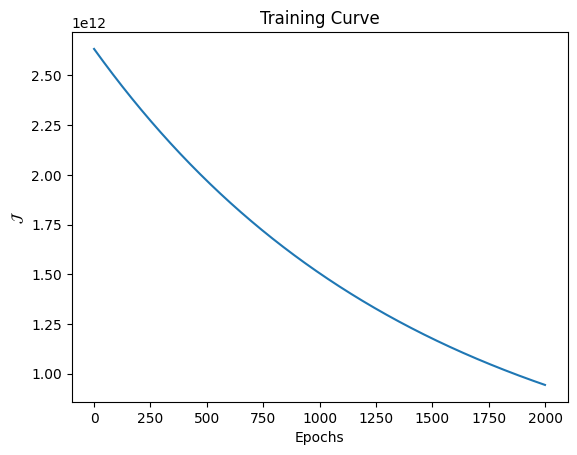

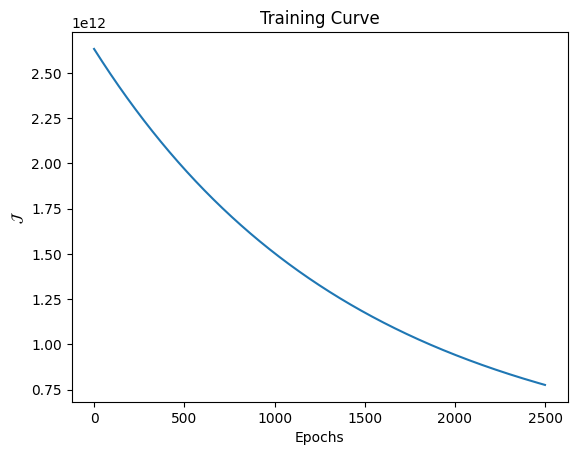

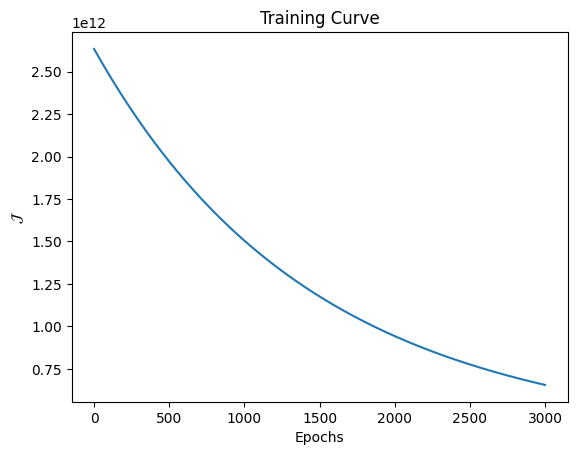

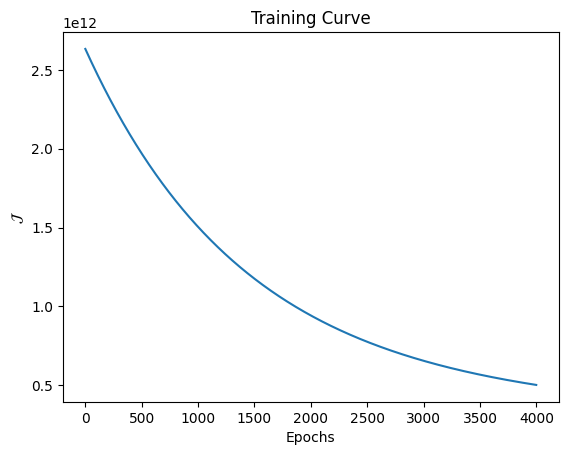

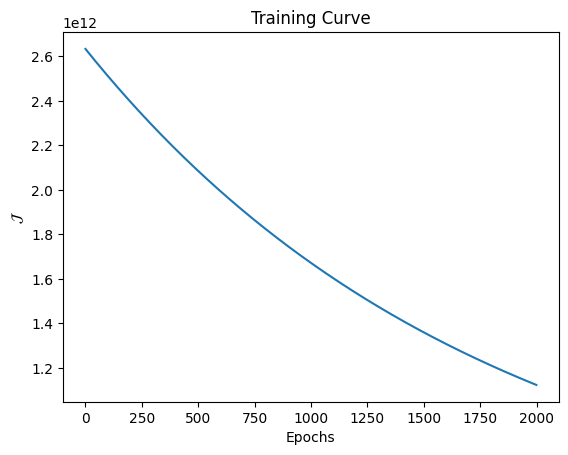

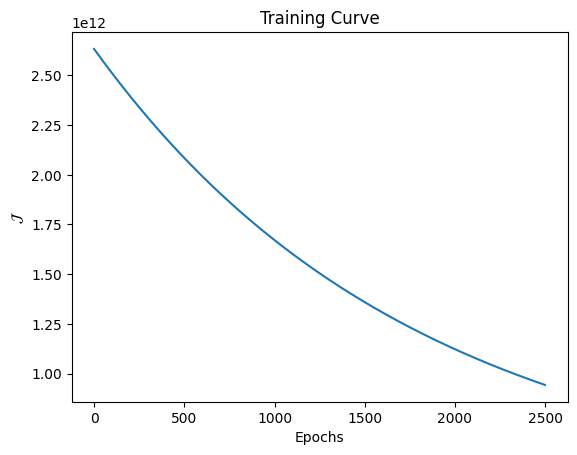

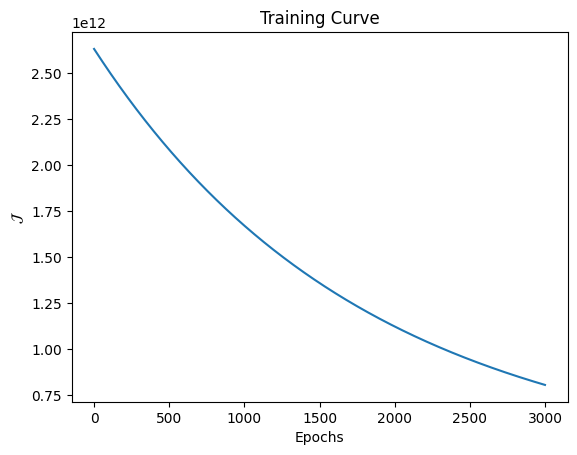

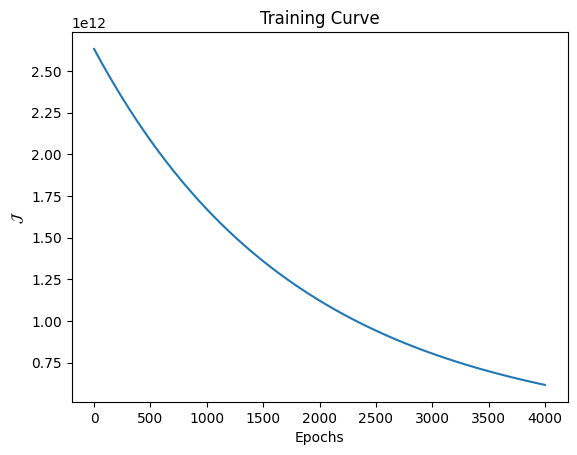

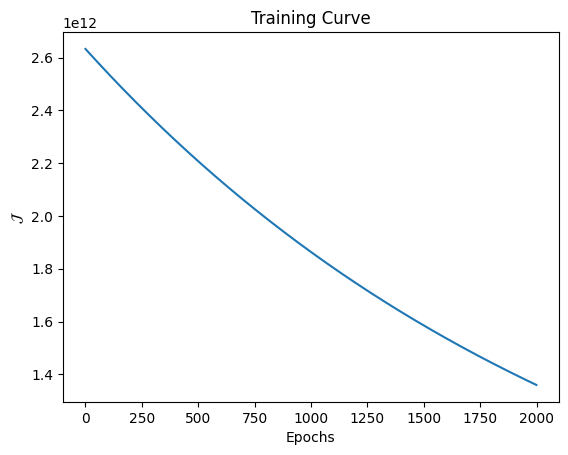

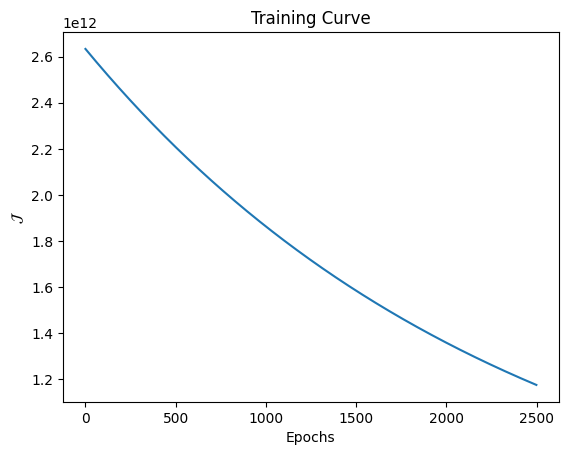

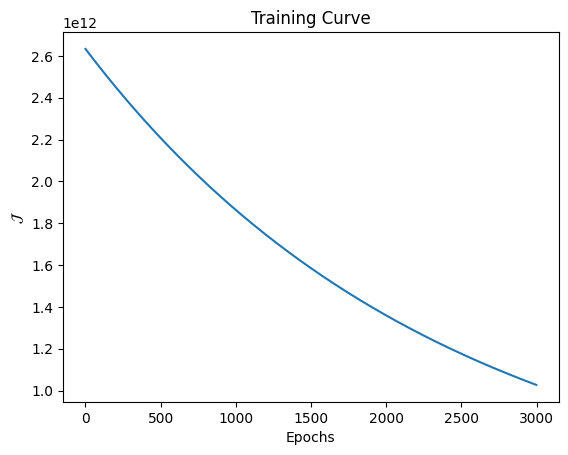

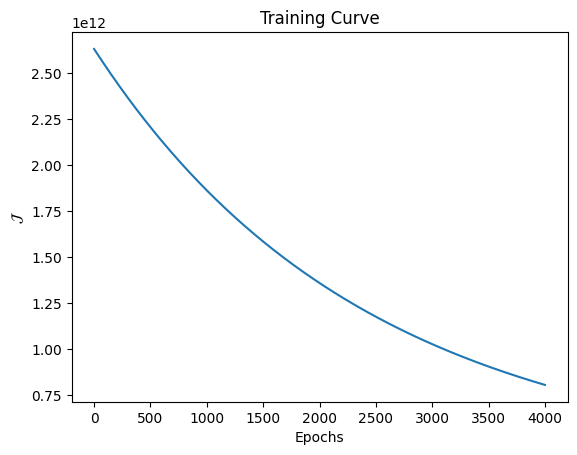

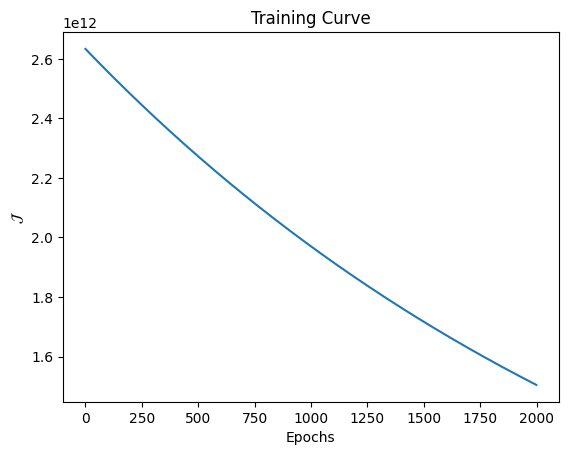

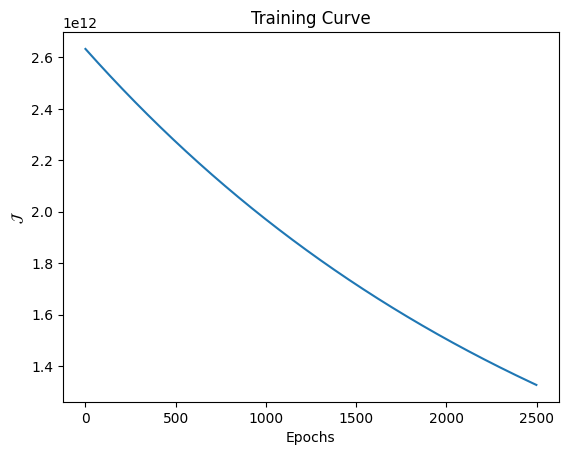

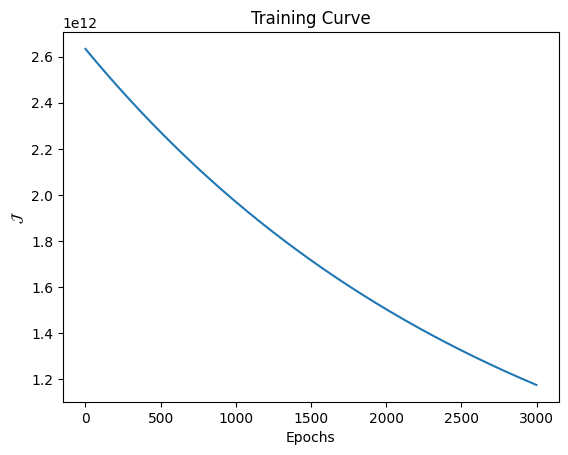

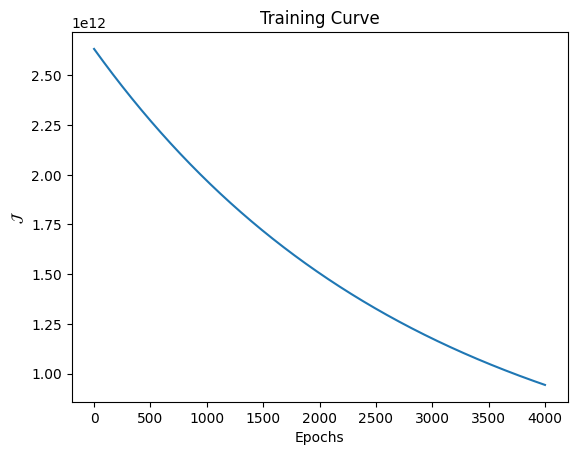

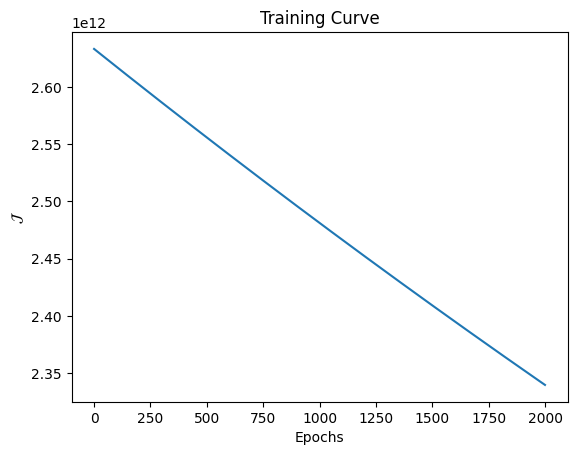

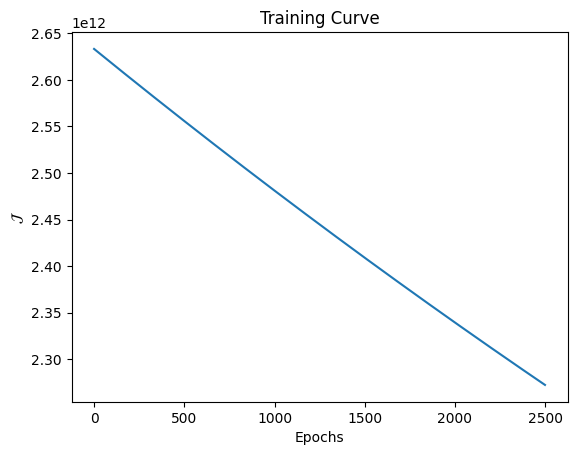

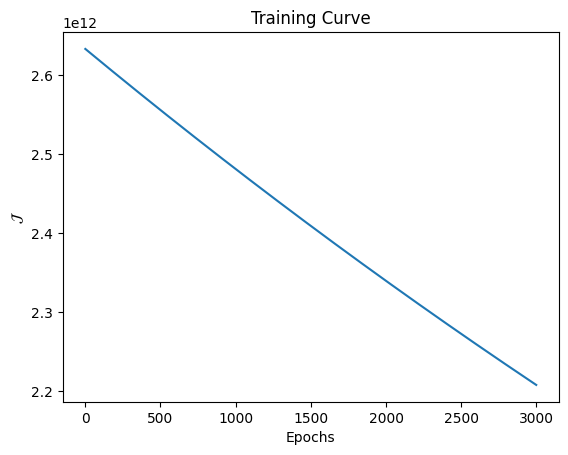

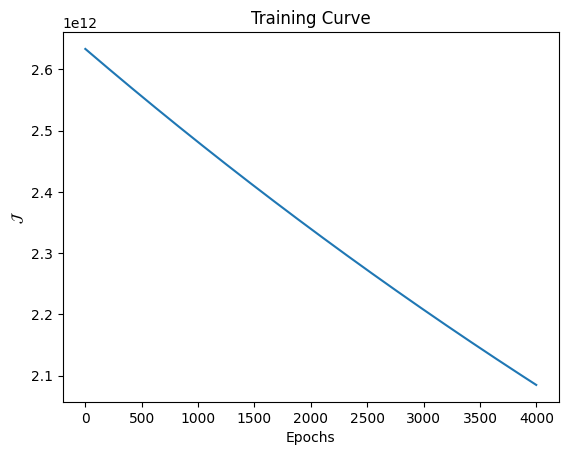

In [122]:
best_eta = 1e-3
best_epochs = 1e3
best_err_model2 = float('inf')
eta_values = [0.001, 0.0008, 0.0006, 0.0005, 0.0001]
epoch_values = [2000, 2500, 3000, 4000]
for eta in eta_values:
    for epochs in epoch_values:
        model2.fit(X_train_model2, y_train_model2, eta=eta, epochs=epochs, show_curve=True)
        y_hat_model2 = model2.predict(X_test_model2)
        err = MAPE(y_test_model2, y_hat_model2)
        if err < best_err_model2:
            best_err_model2 = err
            best_eta = eta
            best_epochs = epochs
print(f"Best eta: {best_eta}, Best epochs: {best_epochs}, Best error: {best_err_model2}")

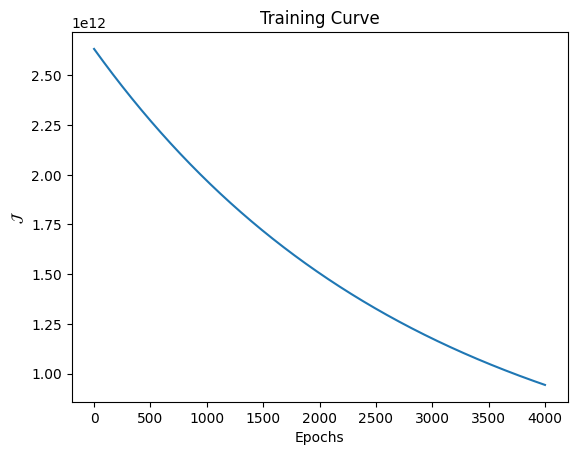

In [123]:
model2.fit(X_train_model2, y_train_model2, eta=0.0005, epochs=4000, show_curve=True)

In [124]:
y_hat_model2 = model2.predict(X_test_model2)
y_hat_model2

array([953507.71995217, 850502.06470439, 828427.37168833, ...,
       783491.07685373, 876339.83389819, 895077.45289033])

In [125]:
y_train_model2

array([4200000,  606000, 4200000, ..., 3411450,  625000, 4200000])

In [126]:
MAPE(y_test_model2, y_hat_model2)

45.27965317496927

## KNN Regressor

In [127]:
class KNNRegressor():
  def fit(self, X, y):
    self.X = X
    self.y = y

  def predict(self, X, K, epsilon = 1e-3):
    N = len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2, axis=1)
      idxt = np.argsort(dist2)[:K]
      gamma_k = np.exp(-dist2[idxt])/(np.exp(-dist2[idxt]).sum()+epsilon)
      y_hat[i] = gamma_k.dot(self.y[idxt])
    return y_hat


In [128]:
# Instantiate our class
model3 = KNNRegressor()

In [129]:
model3.fit(X_train_model2, y_train_model2)

In [130]:
best_k_model3 = 3
best_err_model3 = 100
for i in range(3, 11):
  y_hat_model3 = model3.predict(X_test_model2, i)
  err = MAPE(y_test_model2, y_hat_model3)
  if err < best_err_model3:
    best_err_model3 = err
    best_k_model3 = i
print(best_k_model3, best_err_model3)

3 5.632407791646382


In [131]:
y_hat_model3 = model3.predict(X_test_model2, 3)
y_hat_model3

array([ 576140.88170572,  611449.23558144, 1936354.54848384, ...,
       1073584.13862046,  712395.62259131, 2149283.57214262])

In [132]:
MAPE(y_test_model2, y_hat_model3)

5.632407791646382

## Simple LR

In [133]:
# class SimpleLinearReg():
#   def fit(self, X, y):
#     self.y = y
#     self.d = np.mean(X**2)-np.mean(X)**2
#     self.w1 = (np.mean(X*y)-np.mean(X)*np.mean(y))/self.d
#     self.w0 = (np.mean(y)*np.mean(X**2)-np.mean(X)*np.mean(X*y))/self.d

#   def predict(self, X, show= 0):
#     y_hat = self.w1*X+ self.w0
#     if show:
#       plt.figure()
#       plt.scatter(X, self.y, s=8)
#       plt.plot(X, y_hat, color="#FF0070")
#     return y_hat

In [134]:
# model4 = SimpleLinearReg()
# model4.fit(X_train_model2, y_train_model2)